In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ml

/content/drive/MyDrive/ml


import essential libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# **Reading the data set**


In [4]:
df = pd.read_csv('supermarket.csv')

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# 1. Identifying unique values

identifying unique values in all the columns



In [6]:
def findUnique(col):
  print("The number of unique values are "+ str(df[col].nunique()))
  print("The unique values are :")
  print( df[col].unique())

In [7]:
# unique for city
findUnique('City')

The number of unique values are 3
The unique values are :
['Yangon' 'Naypyitaw' 'Mandalay']


In [8]:
# unique for Gender
findUnique('Gender')


The number of unique values are 2
The unique values are :
['Female' 'Male']


In [9]:
# unique for Branch
findUnique('Branch')


The number of unique values are 3
The unique values are :
['A' 'C' 'B']


In [10]:
# unique for Product line
findUnique('Product line')

The number of unique values are 6
The unique values are :
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [11]:
# unique for Payment
findUnique('Payment')

The number of unique values are 3
The unique values are :
['Ewallet' 'Cash' 'Credit card']


In [12]:
# unique for Customer type
findUnique('Customer type')

The number of unique values are 2
The unique values are :
['Member' 'Normal']


2. Finding Missing values
--> Finding missing values in the dataset

In [13]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Find all the missing values in the dataset
# From result we can see that there are no missing values in this dataset

In [14]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# 3. Replacing missing values and null values

In [15]:
#df['Branch'].replace(['A', 'B', 'C'],[1,2,3],inplace=True)

In [16]:
# get the numerical data alone
dn = df._get_numeric_data()
dn.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


**Filling all nan values with the mean of the column**

In [17]:
for col in dn.columns:
  dn[col].fillna(dn[col].mean(), inplace=True)

Filling non numeric columns with missing values with I am Nan 

In [18]:
for col in df.columns:
  if df[col].dtypes == 'object':
    print(df[col].fillna('i am Nan', inplace=True))

None
None
None
None
None
None
None
None
None


In [19]:
df.dropna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


 **4. Normalizing the data using standard scaler or minmax scaler**


In [20]:
ds = df.copy()
ds.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **Convert categorical data to numberical one**

In [21]:
ds['Branch'].replace(['A', 'B', 'C'],[0,1,2],inplace=True)
ds['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
ds['City'].replace(['Yangon', 'Naypyitaw', 'Mandalay'],[0, 1, 2], inplace=True)
ds['Customer type'].replace(['Member', 'Normal'],[0, 1], inplace=True)
ds['Payment'].replace(['Ewallet', 'Cash', 'Credit card'],[0, 1, 2], inplace=True)
ds['Product line'].replace(['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories'],[0, 1, 2, 3, 4, 5], inplace=True)

In [22]:
ds.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,0,0,0,0,74.69,7,26.1415,548.9715,1/5/2019,13:08,0,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,1,15.28,5,3.8200,80.2200,3/8/2019,10:29,1,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,0,1,1,2,46.33,7,16.2155,340.5255,3/3/2019,13:23,2,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,0,0,1,0,58.22,8,23.2880,489.0480,1/27/2019,20:33,0,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,0,1,1,3,86.31,7,30.2085,634.3785,2/8/2019,10:37,0,604.17,4.761905,30.2085,5.3


In [23]:
# get the numerical data alone
# just double checking to take only numerical data
dn = ds._get_numeric_data()
dn.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,2,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3


In [24]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(dn)
print(scaled)

[[0.         0.         0.         ... 0.         0.52161615 0.85      ]
 [1.         0.5        1.         ... 0.         0.06738704 0.93333333]
 [0.         0.         1.         ... 0.         0.31962801 0.56666667]
 ...
 [0.         0.         0.         ... 0.         0.02204857 0.61666667]
 [0.         0.         1.         ... 0.         0.0566222  0.01666667]
 [0.         0.         0.         ... 0.         0.6188354  0.43333333]]


In [25]:
dn.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,2,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3


In [26]:
dn.drop(['gross margin percentage'], axis=1)
dn.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,2,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3


In [27]:
print(dn['Unit price'].min())
print(dn['Unit price'].max())

10.08
99.96


Min max scaler

In [28]:
# min max scaler
X_copy = dn.copy() 
scaler = MinMaxScaler()
X_columns = dn.columns
trans_formed_min_max = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
trans_formed_min_max.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0.0,0.0,0.0,0.0,0.0,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.0,0.521616,0.850000
1,1.0,0.5,1.0,0.0,0.2,0.057855,0.444444,0.067387,0.067387,0.5,0.067387,0.0,0.067387,0.933333
2,0.0,0.0,1.0,1.0,0.4,0.403316,0.666667,0.319628,0.319628,1.0,0.319628,0.0,0.319628,0.566667
3,0.0,0.0,0.0,1.0,0.0,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.0,0.463549,0.733333
4,0.0,0.0,1.0,1.0,0.6,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.0,0.604377,0.216667


Standard scaler

In [29]:
# standard scaler  
scaler = StandardScaler()
X_copy = dn.copy() 
scaler = MinMaxScaler()
X_columns = dn.columns
trans_formed_standard = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
trans_formed_standard.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0.0,0.0,0.0,0.0,0.0,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.0,0.521616,0.850000
1,1.0,0.5,1.0,0.0,0.2,0.057855,0.444444,0.067387,0.067387,0.5,0.067387,0.0,0.067387,0.933333
2,0.0,0.0,1.0,1.0,0.4,0.403316,0.666667,0.319628,0.319628,1.0,0.319628,0.0,0.319628,0.566667
3,0.0,0.0,0.0,1.0,0.0,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.0,0.463549,0.733333
4,0.0,0.0,1.0,1.0,0.6,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.0,0.604377,0.216667


# **5. Apply KNN for the preprocessed dataset use 5 different K Values and 3 different**
# **Distance measures**

In [30]:
#df.drop("Time", axis=1, inplace=True)
#df.drop("Date", axis=1, inplace=True)
#df.drop("Invoice ID", axis=1, inplace=True)
trans_formed_min_max.drop('gross margin percentage', axis=1, inplace=True)

In [31]:
trans_formed_min_max.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0.0,0.0,0.0,0.0,0.0,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.521616,0.850000
1,1.0,0.5,1.0,0.0,0.2,0.057855,0.444444,0.067387,0.067387,0.5,0.067387,0.067387,0.933333
2,0.0,0.0,1.0,1.0,0.4,0.403316,0.666667,0.319628,0.319628,1.0,0.319628,0.319628,0.566667
3,0.0,0.0,0.0,1.0,0.0,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.463549,0.733333
4,0.0,0.0,1.0,1.0,0.6,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.604377,0.216667


In [32]:
#trans_formed_min_max['gross margin percentage'].unique()

In [33]:

def knnValue(kValue, metricccc):

  knn = KNeighborsClassifier(n_neighbors=kValue, metric = metricccc)
  
  numRows = trans_formed_min_max.shape[0]
  trainSize = round(numRows * 0.6) 
  # divide train and test dataset
  train = trans_formed_min_max.iloc[:trainSize, : ]
  test = trans_formed_min_max.iloc[trainSize : , :]

  x_cols = ["City", "Branch","Gender" , "Product line", "Unit price", "Quantity", "Tax 5%", "Total", "Payment", 'cogs', 'gross income', 'Rating']
  y_col = ["Customer type"]

  knn.fit(train[x_cols], train[y_col])
  print("Train score "+str(knn.score(train[x_cols], train[y_col])))
  print("Test score "+str(knn.score(test[x_cols], test[y_col])))
  return (knn.score(test[x_cols], test[y_col]))

In [34]:
x_minKowski = []
y_minKowski = []

x_euclidean = []
y_euclidean = []

x_manhattan = []
y_manhattan = []

In [35]:
y_minKowski.append(knnValue(2, 'minkowski'))
x_minKowski.append(2)

Train score 0.7616666666666667
Test score 0.5125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
#knnValue(3, 'minkowski')
y_minKowski.append(knnValue(3, 'minkowski'))
x_minKowski.append(3)

Train score 0.7416666666666667
Test score 0.5075


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
#knnValue(4, 'minkowski')
y_minKowski.append(knnValue(4, 'minkowski'))
x_minKowski.append(4)

Train score 0.6633333333333333
Test score 0.5275


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
#knnValue(5, 'minkowski')
y_minKowski.append(knnValue(5, 'minkowski'))
x_minKowski.append(5)

Train score 0.6716666666666666
Test score 0.48


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
#knnValue(2, 'euclidean')
y_euclidean.append(knnValue(2, 'euclidean'))
x_euclidean.append(2)

Train score 0.7616666666666667
Test score 0.5125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
#knnValue(3, 'euclidean')
y_euclidean.append(knnValue(3, 'euclidean'))
x_euclidean.append(3)

Train score 0.7416666666666667
Test score 0.5075


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
#knnValue(4, 'euclidean')
y_euclidean.append(knnValue(4, 'euclidean'))
x_euclidean.append(4)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.6633333333333333
Test score 0.5275


In [42]:
#knnValue(5, 'euclidean')
y_euclidean.append(knnValue(5, 'euclidean'))
x_euclidean.append(5)

Train score 0.6716666666666666
Test score 0.48


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
#knnValue(6, 'euclidean')
y_euclidean.append(knnValue(6, 'euclidean'))
x_euclidean.append(6)

Train score 0.6416666666666667
Test score 0.4875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
#knnValue(2, 'manhattan')
y_manhattan.append(knnValue(2, 'manhattan'))
x_manhattan.append(2)

Train score 0.7516666666666667
Test score 0.53


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
#knnValue(3, 'manhattan')
y_manhattan.append(knnValue(3, 'manhattan'))
x_manhattan.append(3)

Train score 0.74
Test score 0.485


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
#knnValue(4, 'manhattan')
y_manhattan.append(knnValue(4, 'manhattan'))
x_manhattan.append(4)

Train score 0.6783333333333333
Test score 0.5125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
#knnValue(5, 'manhattan')
y_manhattan.append(knnValue(3, 'manhattan'))
x_manhattan.append(5)

Train score 0.74
Test score 0.485


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
#knnValue(6, 'manhattan')
y_manhattan.append(knnValue(6, 'manhattan'))
x_manhattan.append(3)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.6583333333333333
Test score 0.4975


# **Ploting the test scores with diffrent kvalues and differnt distance measures**

In [49]:
#minkowski
print("MinKowski x axis"+ str(x_minKowski))
print("MinKowski y axis"+ str(y_minKowski))
#manhattan
print("manhattan x axis"+ str(x_manhattan))
print("manhattan y axis"+ str(y_manhattan))
#euclidean
print("euclidean x axis"+ str(x_euclidean))
print("euclidean y axis"+ str(y_euclidean))

MinKowski x axis[2, 3, 4, 5]
MinKowski y axis[0.5125, 0.5075, 0.5275, 0.48]
manhattan x axis[2, 3, 4, 5, 3]
manhattan y axis[0.53, 0.485, 0.5125, 0.485, 0.4975]
euclidean x axis[2, 3, 4, 5, 6]
euclidean y axis[0.5125, 0.5075, 0.5275, 0.48, 0.4875]


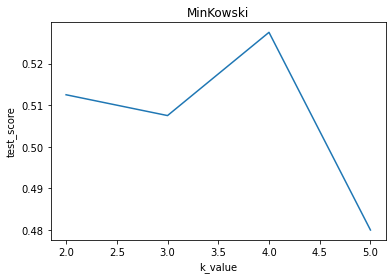

In [50]:
plt.plot(x_minKowski, y_minKowski)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("MinKowski")
plt.plot()
plt.show()

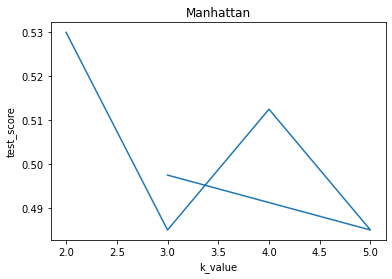

In [51]:
plt.plot(x_manhattan, y_manhattan)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("Manhattan")
plt.plot()
plt.show()

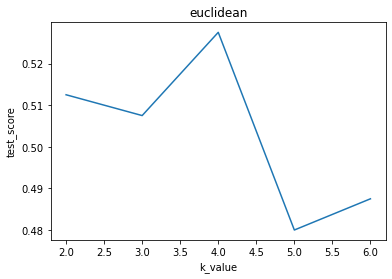

In [52]:
plt.plot(x_euclidean, y_euclidean)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("euclidean")
plt.plot()
plt.show()

**Inference**: From the above graph we can conclude that the manhattan with 2 as k value has the highest test score compared to others


# **6. Display the confusion matrix, accuracy measures, classification report.**

In [53]:
#print(confusion_matrix(y_test,y_pred))

In [54]:
def confusionMatrix(kValue, metricccc):

  knn = KNeighborsClassifier(n_neighbors=kValue, metric = metricccc)
  
  numRows = trans_formed_min_max.shape[0]
  trainSize = round(numRows * 0.6) 
  # divide train and test dataset
  train = trans_formed_min_max.iloc[:trainSize, : ]
  test = trans_formed_min_max.iloc[trainSize : , :]

  x_cols = ["City", "Branch","Gender" , "Product line", "Unit price", "Quantity", "Tax 5%", "Total", "Payment", 'cogs', 'gross income', 'Rating']
  y_col = ["Customer type"]

  knn.fit(train[x_cols], train[y_col])
  
  y_pred = knn.predict(test[x_cols])
  print(classification_report(test[y_col], y_pred))
  print(confusion_matrix(test[y_col],y_pred))
  print('\n__________________________________________________________________________________\n')
  print("Accuracy score:\n")
  print(metrics.accuracy_score(test[y_col], y_pred))

In [55]:
methods_met = ['minkowski', 'euclidean', 'manhattan']

In [56]:
for met in methods_met:
  for i in range(2, 8):
    print('\n*********************************************************************************\n')
    print("\nThe Score of "+met+" with k value of "+str(i)+" is: ")
    print('\n__________________________________________________________________________________\n')
    print(confusionMatrix(i, met))
    print('\n**********************************************************************************\n\n\n')


*********************************************************************************


The Score of minkowski with k value of 2 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.54      0.68      0.60       217
         1.0       0.45      0.32      0.37       183

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.51      0.50       400

[[147  70]
 [125  58]]

__________________________________________________________________________________

Accuracy score:

0.5125
None

**********************************************************************************




*********************************************************************************


The Score of minkowski with k value of 3 is: 

__________________________________________________________________________________

              pre

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54       217
         1.0       0.44      0.41      0.42       183

    accuracy                           0.49       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.49      0.49      0.49       400

[[120  97]
 [108  75]]

__________________________________________________________________________________

Accuracy score:

0.4875
None

**********************************************************************************




*********************************************************************************


The Score of minkowski with k value of 7 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.54      0.41      0.46       217
         1.0       0.46      0.60      0.52       183

    accuracy                           0.49       400
   macro avg   

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.53      0.41      0.46       217
         1.0       0.45      0.57      0.50       183

    accuracy                           0.48       400
   macro avg       0.49      0.49      0.48       400
weighted avg       0.49      0.48      0.48       400

[[ 88 129]
 [ 79 104]]

__________________________________________________________________________________

Accuracy score:

0.48
None

**********************************************************************************




*********************************************************************************


The Score of euclidean with k value of 6 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54       217
         1.0       0.44      0.41      0.42       183

    accuracy                           0.49       400
   macro avg     

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.54      0.64      0.59       217
         1.0       0.46      0.36      0.40       183

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.51      0.50       400

[[139  78]
 [117  66]]

__________________________________________________________________________________

Accuracy score:

0.5125
None

**********************************************************************************




*********************************************************************************


The Score of manhattan with k value of 5 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.53      0.42      0.47       217
         1.0       0.45      0.56      0.50       183

    accuracy                           0.48       400
   macro avg   

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
confusionMatrix(2, 'minkowski')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.54      0.68      0.60       217
         1.0       0.45      0.32      0.37       183

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.51      0.50       400

[[147  70]
 [125  58]]

__________________________________________________________________________________

Accuracy score:

0.5125


In [58]:
confusionMatrix(3, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49       217
         1.0       0.47      0.60      0.53       183

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.52      0.51      0.51       400

[[ 94 123]
 [ 74 109]]

__________________________________________________________________________________

Accuracy score:

0.5075


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [59]:
confusionMatrix(4, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.56      0.65      0.60       217
         1.0       0.48      0.39      0.43       183

    accuracy                           0.53       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.53      0.52       400

[[140  77]
 [112  71]]

__________________________________________________________________________________

Accuracy score:

0.5275


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
confusionMatrix(5, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.53      0.41      0.46       217
         1.0       0.45      0.57      0.50       183

    accuracy                           0.48       400
   macro avg       0.49      0.49      0.48       400
weighted avg       0.49      0.48      0.48       400

[[ 88 129]
 [ 79 104]]

__________________________________________________________________________________

Accuracy score:

0.48


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
confusionMatrix(6, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54       217
         1.0       0.44      0.41      0.42       183

    accuracy                           0.49       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.49      0.49      0.49       400

[[120  97]
 [108  75]]

__________________________________________________________________________________

Accuracy score:

0.4875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
def naiv():

  # instantiate the model
  gnb = GaussianNB()


  numRows = trans_formed_min_max.shape[0]
  trainSize = round(numRows * 0.6) 
  # divide train and test dataset
  train = trans_formed_min_max.iloc[:trainSize, : ]
  test = trans_formed_min_max.iloc[trainSize : , :]

  x_cols = ["City", "Branch","Gender" , "Product line", "Unit price", "Quantity", "Tax 5%", "Total", "Payment", 'cogs', 'gross income', 'Rating']
  y_col = ["Customer type"]
    # fit the model
  gnb.fit(train[x_cols], train[y_col])
  y_pred = gnb.predict(test[x_cols])

  print(y_pred)
  
  print('\n\nModel accuracy score: {0:0.4f}\n\n'. format(accuracy_score(test[y_col], y_pred)))


In [70]:
naiv()

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
